# Homework 4 - Data Analytics

---

Before we start this section, we want to say something.

> This notebook is tend to show the power of the decision tree and the
  SVM model. Using model like this in real life could harm the freedom
  of speech.

> To check if the review is spam or not, we need to read the review
  cautiously. Treating someone's review as spam according to the model like
  this is considered harmful and unwise.

---

## Context

This file is the homework practice from my university course "Fundamentals of
data analytics".
Below are the cover of my analysis.

---

## Source
[Drug Review Dataset (Drugs.com)][dataset_link]

Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder.
2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain
and Cross-Data Learning.
In Proceedings of the 2018 International Conference on Digital Health (DH '18).
ACM, New York, NY, USA, 121-125. DOI: [Web Link][doi_link]

[dataset_link]: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29
[doi_link]: https://doi.org/10.1145/3194658.3194677

---

## Import Library

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Import Dataset

In [2]:
train_dataframe = pd.read_csv('input/drugsComTrain_raw.tsv', sep='\t')
test_dataframe = pd.read_csv('input/drugsComTest_raw.tsv', sep='\t')

## Remove incomplete data

In [3]:
train_dataframe.dropna(axis='index', how='any', inplace=True)
test_dataframe.dropna(axis='index', how='any', inplace=True)

---

## Analyze the data

### Overall info

At first, let's show the overall info

In [4]:
train_size = train_dataframe.shape[0]
test_size = test_dataframe.shape[0]
total_size = train_size + test_size

print('Overall dataset size: {0}'.format(total_size))
print('Overall training dataset size : {0} ({1:3.1f}%)'.format(
    train_size, (train_size / total_size * 100)))
print('Overall testing dataset size: {0} ({1:3.1f}%)'.format(
    test_size, (test_size / total_size * 100)))

Overall dataset size: 213869
Overall training dataset size : 160398 (75.0%)
Overall testing dataset size: 53471 (25.0%)


The ratio of the dataset(training: testing) is 3:1. And the data amount is
really high.

### Wasted data removal

Next, we want to check out how many drugs and conditions are recorded in the
dataset.

In [5]:
dataframe = pd.concat([train_dataframe, test_dataframe])
print('Total drugs recorded: {0}'.format(dataframe['drugName'].nunique()))
print('Total conditions found: {0}'.format(dataframe['condition'].nunique()))

Total drugs recorded: 3667
Total conditions found: 916


In [6]:
dataframe['drugName'].unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Pegaptanib', 'FiberCon',
       'Allergy DN PE'], dtype=object)

In [7]:
dataframe['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

About 3000 drugs and 900 conditions were recorded in the dataset. But if you
look closer you can see the conditions have some wasted data which we don't
want to deal with.

Fortunally, it seems like the wasted data has some patterns. We can filter
out these data.

In [8]:
def pattern_filter(df, column, pattern):
    import numpy as np
    drop_index = np.array(df.loc[df[column].str.contains(pattern)].index)
    return df.drop(index=drop_index)

def remove_pattern(df):
    filtered_column = 'condition'
    filter_pattern = 'users found this comment helpful.'
    return pattern_filter(df, filtered_column, filter_pattern)

In [9]:
train_dataframe = remove_pattern(train_dataframe)
test_dataframe = remove_pattern(test_dataframe)

In [10]:
dataframe = pd.concat([train_dataframe, test_dataframe])
print('Total drugs recorded: {0}'.format(dataframe['drugName'].nunique()))
print('Total conditions found: {0}'.format(dataframe['condition'].nunique()))

Total drugs recorded: 3654
Total conditions found: 836


In [11]:
dataframe['drugName'].unique()

array(['Valsartan', 'Guanfacine', 'Lybrel', ..., 'Pegaptanib', 'FiberCon',
       'Allergy DN PE'], dtype=object)

In [12]:
dataframe['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

## Categorical attribute

In [13]:
train_dataframe.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

Above shows the type of the dataset.
According to the original dataset attribute information, sometype of the
attribute is wrong and need to be fixed.

In [14]:
def df_change_type(df):
    df['drugName'] = df['drugName'].astype('category')
    df['condition'] = df['condition'].astype('category')
    return df

In [15]:
train_dataframe = df_change_type(train_dataframe)
test_dataframe = df_change_type(test_dataframe)

Now the dataset is clean. We can proceed the analysis.

In [16]:
train_dataframe.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


From the table, we can see the attribute of the dataset.
* `Unnamed: 0`: don't know what that means
* `drugName`: the name of drug
* `condition`: the name of condition
* `review`: patient review
* `rating`: 10 star patient rating
* `date`: date of review entry
* `usefulCount`: number of users who found this review is useful

Now, let's watch the correlation of the dataset. Since the correlation is only
for numberic data. We can only choose the `rating` and `usefulCount`
attribute.

In [17]:
def normalize(dataset):
    return (dataset - dataset.mean()) / (dataset.max() - dataset.min())

In [18]:
heapmap = pd.concat([train_dataframe, test_dataframe]) \
    .loc[:, ['rating', 'usefulCount']].apply(normalize)

<Figure size 432x288 with 0 Axes>

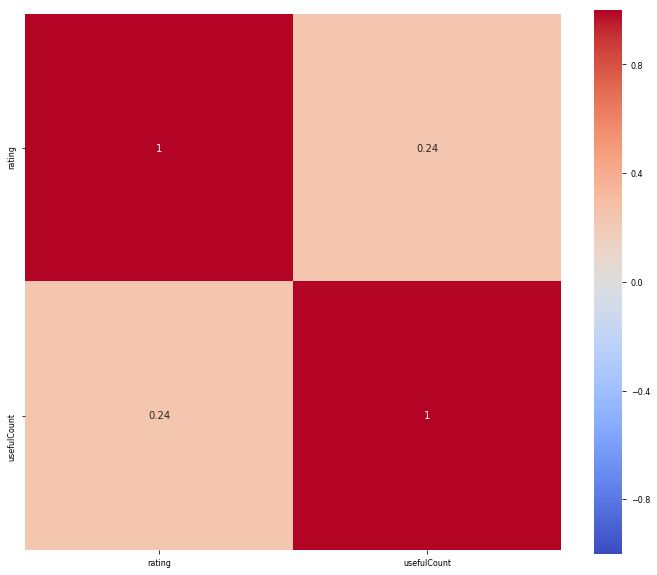

In [19]:
plt.clf()
plt.style.use('seaborn-paper')
plt.figure(figsize=(12, 10))
_ = sns.heatmap(heapmap.corr(), vmin=-1, vmax=1,
                square=True, annot=True, cmap='coolwarm')

Well... Both attribute are not correlating to each other. This is good and
important news since we don't want some review that "controls" the rating
too much.

---

# Define the problem

Now, the basic analysis is done. It's time to define the problem.

> We want to see if the review is spam or not. That it to say, if the
  reputation of the drug is high. It might be a spam if another review rate
  it low.

This question is tend to solve the spamming review which happened in the
review system. Although it is unrealistic, we still want to see if it works.

Before we start, we have something that we want to show:

In [20]:
print(train_dataframe.columns.values)

['Unnamed: 0' 'drugName' 'condition' 'review' 'rating' 'date'
 'usefulCount']


* Useful rating: `usefulRating` attribute shows whether the review is useful.
 higher count means more people find this review is trusted.
* Review text: `review` is useful for syntax analysis because it show the
 user's condition. However, we will remove this attribute since we have
 `usefulRating` which already represent the trust ingredient.
* Date: Sometimes a drug review can change as time flies. But in this case,
  we assume that the time won't affect the review.

From our analysis, we need to define and remove the attribute.

## Define the result

We want to see what kind of review we can watch so that we can define the
result attribute.

Below are the review which rating is 10, 5, and 1.

In [21]:
def df_show_range(df, score):
    review_df = df[df['rating'].between(score - 0.5, score + 0.5)]
    return review_df.loc[:, ['review']]

In [22]:
print('rating: 10.0')
df_show_range(pd.concat([train_dataframe, test_dataframe]), 10.0).head()

rating: 10.0


,review
7,"""Abilify changed my life. There is hope. I was..."
11,"""I have taken anti-depressants for years, with..."
18,"""I&#039;ve been on every medicine under the su..."
19,"""I have been on Tasigna for just over 3 years ..."
21,"""I have insomnia, it&#039;s horrible. My story..."


In [23]:
print('rating: 5.0')
df_show_range(pd.concat([train_dataframe, test_dataframe]), 5.0).head()

rating: 5.0


,review
2,"""I used to take another oral contraceptive, wh..."
43,"""I have been taking this medicine due to lower..."
64,"""I was off birth control for a while consideri..."
97,"""I am torn by the Nuvaring. The convenience is..."
147,"""I have been a long term sufferer of chronic p..."


In [24]:
print('rating: 1.0')
df_show_range(pd.concat([train_dataframe, test_dataframe]), 1.0).head()

rating: 1.0


,review
6,"""He pulled out, but he cummed a bit in me. I t..."
8,""" I Ve had nothing but problems with the Kepp..."
24,"""Do not use the cream that comes with this. It..."
33,"""The burning is out of control about 20 minute..."
36,"""SO MUCH PAIN! \r\nIn the last 2 years I have ..."


From the review attribute, we can see:

* Higher rating review has more positive sentenses, While the lower rating one
  tend to have negative sentenses.
* Middle rating review have mixed sentenses.
* Some review has multiple drugs applied, we will treat these drugs as
  distinct result since it might provide different feelings.

We can use these as the indication of the result.

### Add specific attribute to help analyze

More people found the review useful, more people trusted this review.
We can make a weight attribute to show the reputation of the drugs.
We call it `reputation`.

We multiply the `rating` attribute with the (`usefulCount` + 1) **since the
review itself count**.

In [25]:
def df_add_reputation(df):
    df['reputation'] = df['rating'] * (df['usefulCount'] + 1)
    return df

In [26]:
train_dataframe = df_add_reputation(train_dataframe)
test_dataframe = df_add_reputation(test_dataframe)

### Define the result

Now we have the reputation. We can make a sheet of the overall standing of
drugs.

In [27]:
def drug_sheet(df):
    sum_df = df.groupby(['drugName', 'condition'])['reputation'].sum()
    size_df = \
        df.groupby(['drugName', 'condition'])['usefulCount'].sum() + \
        df.groupby(['drugName', 'condition'])['usefulCount'].count()
    return (sum_df / size_df)

In [28]:
reputation_sheet = \
    pd.DataFrame(drug_sheet(pd.concat([train_dataframe, test_dataframe])),
                 columns=['drugRating'])

Then, we can apply the drug reputation back to the dataset.

If the review rating is not match the drug rating, we mark it as 1.
Otherwise, we mark it as 0.

In [29]:
def df_add_result(df, sheet, split=5.5):
    df = df.join(sheet, how='left', on=['drugName', 'condition'])
    df['isSpam'] = (df['rating'] > split) != (df['drugRating'] > split)
    df['isSpam'] = df['isSpam'].map({False: 0, True: 1})
    return df

In [30]:
train_dataframe = df_add_result(train_dataframe, reputation_sheet)
test_dataframe = df_add_result(test_dataframe, reputation_sheet)

### Set Index

In [31]:
train_dataframe = train_dataframe.set_index(['drugName', 'condition'])
test_dataframe = test_dataframe.set_index(['drugName', 'condition'])

### Useless attribute removal

We need to watch which column is useless to us.

We don't know about `Unnamed: 0` is. Maybe is the user id or data id.
In either case, we'll remove it since it is useless for us.

Remember what we say about the `review` and `date` attribute. We need to
remove it as well.

Third, the model cannot operate with string. So we will remove it as well.

Now we know which attribute we need to remove. It's time to do it.

In [32]:
columns = ['Unnamed: 0', 'review', 'date']

train_dataframe.drop(columns=columns, inplace=True)
test_dataframe.drop(columns=columns, inplace=True)

## Split up the attribute and result

In [33]:
def df_split(df, column):
    attribute = df.drop(columns=column)
    answer = df[column]
    return attribute, answer

In [34]:
train_attribute, train_answer = df_split(train_dataframe, 'isSpam')
test_attribute, test_answer = df_split(test_dataframe, 'isSpam')

---

## Predict the result

We will predice the result by using decision tree and SVM. Both models
handle the classification perfectly.

### Decision tree

Below shows the model of the tree

In [35]:
def generate_decision_tree(data, right_answer,
                           max_depth=None, max_leaf_nodes=None):
    from sklearn.tree import DecisionTreeClassifier

    decision_tree = DecisionTreeClassifier(max_depth=max_depth,
                                           max_leaf_nodes=max_leaf_nodes)
    decision_tree.fit(data, right_answer)
    return decision_tree

def get_graph_from_decision_tree(tree, attribute):
    import pydotplus
    from sklearn.externals.six import StringIO
    from sklearn.tree import export_graphviz

    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=list(attribute),
                    class_names=['reject', 'pass'], filled=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def display_image(graph):
    from IPython.display import Image

    return Image(graph.create_png())

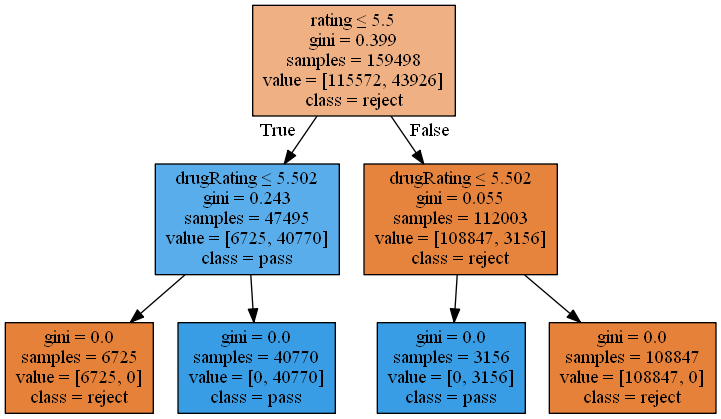

In [36]:
perfect_tree = generate_decision_tree(
    train_attribute, train_answer.to_numpy())
graph = get_graph_from_decision_tree(perfect_tree, train_attribute)
display_image(graph)

Predict the result of the model

In [37]:
test_predict = perfect_tree.predict(test_attribute)

In [38]:
def decision_tree_accuracy(answer, predict):
    from sklearn.metrics import accuracy_score

    return accuracy_score(answer, predict)

In [39]:
print('Predict accuracy: {0}%'
      .format(decision_tree_accuracy(test_answer, test_predict) * 100))

Predict accuracy: 100.0%


Since the decision tree knows the relative attribute which influence the
result. It is reasonable to have high accuracy.

### SVM

Below shows the model of the SVM. Since the dataset is really large, we will
use only 1000 data from both training and testing set.

Before we operated, let's defined some function for later uses.

In [40]:
def svm_std(train, test):
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(train)
    train_std = scaler.transform(train)
    test_std = scaler.transform(test)
    return train_std, test_std

def svm_model_generator(attribute, answer,
                        C=1.0, kernel='linear', probability=True,
                        random_state=None, max_iter=-1):
    from sklearn.svm import SVC

    svm_model = SVC(C=C, kernel=kernel, probability=probability,
                    random_state=random_state, max_iter=max_iter,
                    gamma='scale')
    svm_model.fit(attribute, answer)
    return svm_model

def plot_svm(attribute, answer, model, penalty, label=''):
    def plot_svm_classifier(attribute, answer, model, label):
        from mlxtend.plotting import plot_decision_regions

        plt.clf()
        _, ax = plt.subplots()
        _ = plot_decision_regions(X=attribute, y=answer, clf=model, legend=2,
                                  feature_index=(0, 3),
                                  filler_feature_values={1: 0, 2: 0},
                                  filler_feature_ranges={1: 5, 2: 5},
                                  ax=ax)
        ax.set_xlabel('rating')
        ax.set_ylabel('drugRating')
        ax.set_title(label)

    plot_svm_classifier(attribute, answer.values, model=model, label=label)
    plt.show()
    print('C: {:.2f}, Train Acc: {:.2f}%'.format(
        penalty, model.score(attribute, answer) * 100))

And standardize the attribute

In [41]:
svm_train_attribute, svm_test_attribute = \
    svm_std(train_attribute, test_attribute)

C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Linear Model

In [42]:
penalty = 0.05
svm_model = \
    svm_model_generator(svm_train_attribute[:1000],
                        train_answer.head(1000).values,
                        C=penalty, kernel='linear')

<Figure size 460.8x316.8 with 0 Axes>

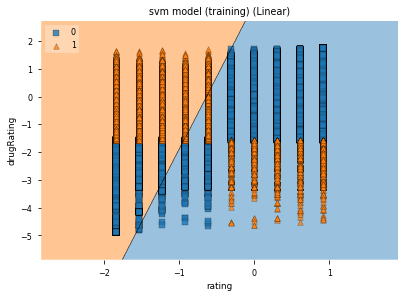

C: 0.05, Train Acc: 92.17%


In [43]:
plot_svm(svm_train_attribute, train_answer, svm_model, penalty,
         label='svm model (training) (Linear)')

<Figure size 460.8x316.8 with 0 Axes>

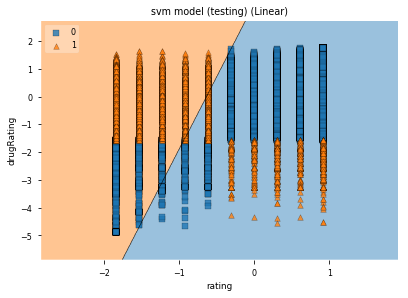

C: 0.05, Train Acc: 91.95%


In [44]:
plot_svm(svm_test_attribute, test_answer, svm_model, penalty,
         label='svm model (testing) (Linear)')

#### Poly Model

In [45]:
penalty = 0.05
svm_model = \
    svm_model_generator(svm_train_attribute[:1000],
                        train_answer.head(1000).values,
                        C=penalty, kernel='poly')

<Figure size 460.8x316.8 with 0 Axes>

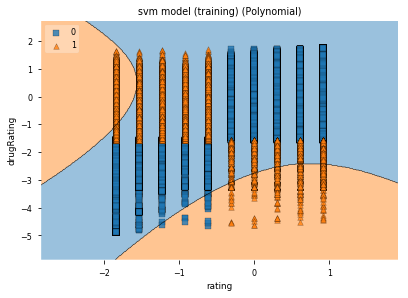

C: 0.05, Train Acc: 87.24%


In [46]:
plot_svm(svm_train_attribute, train_answer, svm_model, penalty,
         label='svm model (training) (Polynomial)')

<Figure size 460.8x316.8 with 0 Axes>

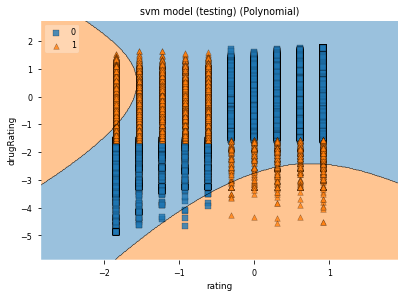

C: 0.05, Train Acc: 86.95%


In [47]:
plot_svm(svm_test_attribute, test_answer, svm_model, penalty,
         label='svm model (testing) (Polynomial)')

#### Radial Basis Function Model (RBF)

In [48]:
penalty = 0.05
svm_model = \
    svm_model_generator(svm_train_attribute[:1000],
                        train_answer.head(1000).values,
                        C=penalty, kernel='rbf')

<Figure size 460.8x316.8 with 0 Axes>

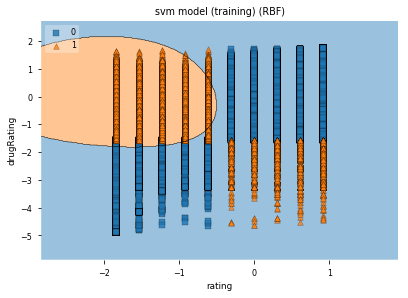

C: 0.05, Train Acc: 96.45%


In [49]:
plot_svm(svm_train_attribute, train_answer, svm_model, penalty,
         label='svm model (training) (RBF)')

<Figure size 460.8x316.8 with 0 Axes>

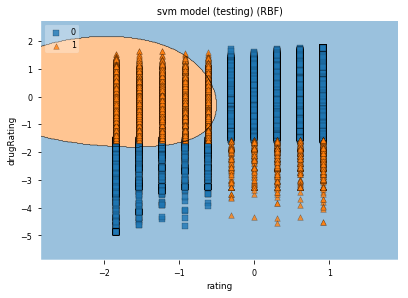

C: 0.05, Train Acc: 96.34%


In [50]:
plot_svm(svm_test_attribute, test_answer, svm_model, penalty,
         label='svm model (testing) (RBF)')


#### Sigmoid Model

In [51]:
penalty = 0.05
svm_model = \
    svm_model_generator(svm_train_attribute[:1000],
                        train_answer.head(1000).values,
                        C=penalty, kernel='sigmoid')

<Figure size 460.8x316.8 with 0 Axes>

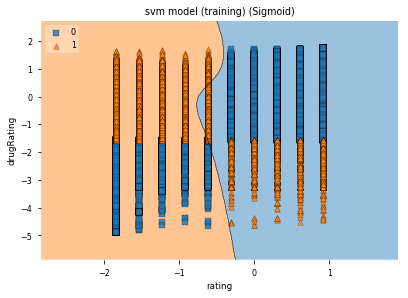

C: 0.05, Train Acc: 91.51%


In [52]:
plot_svm(svm_train_attribute, train_answer, svm_model, penalty,
         label='svm model (training) (Sigmoid)')

<Figure size 460.8x316.8 with 0 Axes>

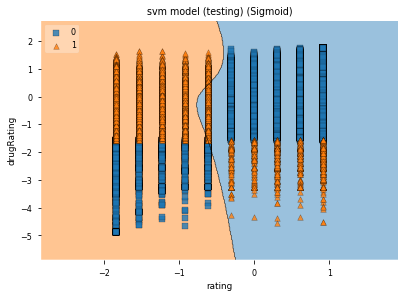

C: 0.05, Train Acc: 91.22%


In [53]:
plot_svm(svm_test_attribute, test_answer, svm_model, penalty,
         label='svm model (testing) (Sigmoid)')

---

## Discussion

From the above models, we can see something instresting.

* Decision tree generated really good result. Since it reads the attribute
  which influence the result. It is no doubt that the accuracy is high.
* All of the SVM models listed above has varied accuracy. Since 4 kernel
  functions are not suited for this dataset, it is reasonable.
* From SVM Model, we can see that the data is split into two categories.
  This dataset is form of 4 square, intersect with each other.
* For SVM model, RBF model served higher accuracy than the rest 3 kernels.
  And polynomial has lowerest accuracy among others.

---

Friendly reminder:

> This notebook is tend to show the power of the decision tree and the
  SVM model. Using model like this in real life could harm the freedom
  of speech.

> To check if the review is spam or not, we need to read the review
  cautiously. Treating someone's review as spam according to the model like
  this is considered harmful and unwise.